# Project Part 3
By Francisco Muniz

## Introduction/Background

I'm using users' tweets about the Marvel Endgame movie. With these tweets, i'll try to generate text that is related to the Marvel Endgame movie. By the end of this project I will compare real tweets from the generated. To see if one can tell the difference between the two. 


## Exploratory Data Analysis


In [1]:
# I put imports I need for the beginning here.
import pandas as pd
import numpy as np
import os
# ...

In [2]:
for dirname, _, filenames in os.walk('../'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../lib/kaggle/gcp.py
../input/tweets/tweets.csv
../working/__notebook_source__.ipynb


In [3]:
df = pd.read_csv('../input/tweets/tweets.csv')
df.head(5)


,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN
1,2,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...",False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,4/23/2019 10:43,False,NaN,1.120640e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN


#### Above is the data that will be used to generate text . This is showing the first 5 tweets of the data set that we have. But in whole there are 10,000 tweets. 

<AxesSubplot:>

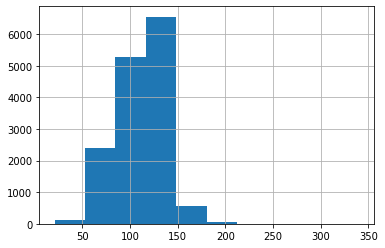

In [4]:
df['text'].str.len().hist()

#### This is the data of how many characters (x-axis) people use to make one tweet. As well how many people used a specific number of characters for one tweet (y-axis). 

<AxesSubplot:>

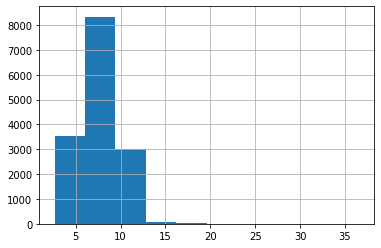

In [5]:
df['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#### Above is the average word length in each sentence. As we can see the average length of each sentence is from 5-10 words. Let's see if this small change does anything. 

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
print (stop)

{"couldn't", 'where', 'once', 'too', 'other', 'yourself', 'hadn', 'you', 'yours', 'the', 'with', 'did', 't', 'who', 'to', "haven't", 'theirs', "won't", 'them', 'that', 'he', 'before', 'such', 'hasn', 'ma', 'because', 'won', 'in', 'they', 'if', 'again', "you've", 'what', 'yourselves', 'she', 'during', 'between', 've', 'am', 'weren', 'mightn', 'have', 'for', 'about', 'been', 'nor', 'being', "she's", 'whom', 'and', 'each', 'shan', "weren't", "aren't", 'this', 'no', 'wasn', 'an', 're', 'doing', 'couldn', 'i', 'mustn', 'under', 'here', 'when', 'all', 'now', 'having', 'same', "shan't", 'out', 'our', "mightn't", "wasn't", 'its', 'against', 'above', 'which', 'below', 'those', 'will', "don't", "wouldn't", 'her', 'or', 'after', 'more', 'than', "it's", 'isn', 'hers', "hasn't", "hadn't", 'so', 'just', 'there', 'own', 'should', 'y', 'down', "that'll", 'of', 'has', 'through', 'were', 'both', 'ain', 'haven', 'needn', 'most', 'be', 'how', 'a', 'until', 'we', 'by', "you'd", 'as', 'are', 'some', 'then',

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Will be finding stop words and to see the most common words. Above are the stopwords we will be taking out.ntlk has multiple languages because these tweets are all English. We will put English as the languages we are looking for. 

In [7]:

corpus=[]
df['tokens']= df['text'].str.split()
df['tokens']= df['tokens'].values.tolist()
corpus=[word for i in df['tokens'] for word in i]

import collections
from collections import defaultdict, Counter
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

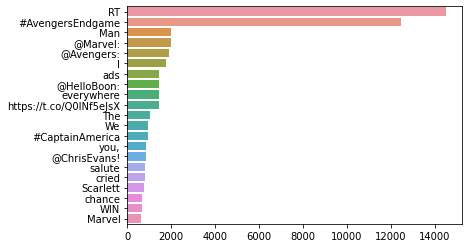

In [8]:
import seaborn as sns
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

#### Now we will use a model and try to generate text.

In [9]:
from transformers import AutoModelForCausalLM, AutoTokenizer
MODEL_NAME = 'gpt2-medium'

model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [10]:
prompt = "@Marvel"
inputs = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")
prompt_length = len(tokenizer.decode(inputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True))
outputs = model.generate(inputs, max_length=15, do_sample=True, top_p=0.95, top_k=50, temperature=1.5, num_return_sequences=20)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [11]:
for i in range(len(outputs)):
    generated = tokenizer.decode(outputs[i])
    print(generated)

@Marvel] | | [Vampire Academy] | | [Fairy
@Marvel]<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>
@Marvel Studios. Marvel Entertainment Group Inc (NYSE:MARG) has
@Marvel] has some big reveals this year for the book that opens July
@MarvelHeroes","slug":"shenzhi-museum
@Marvel at a rate above the market median and an estimated sales markdown
@Marvel's Agent Carter – The Black Mirror episode and the series premieres
@Marvel to the Star in the Marvel Cinematic Universe, The CW to
@MarvelousGames.COM I can confirm what the media had always been
@Marvel's Luke Cage Season 2 has been described as a very heavy,
@Marvel Comics]

Darth Vader [UDON]


@Marvel.com

Marvel Studios – June 4

Marvel/
@Marvel - You're so nice

We will be in London!
@MarvelousAI | Twitch Streams | @CakeOfEvil2
@Marvel.net), and it is rumored that the character will finally re
@MarvelUniverse) are part of this p

#### Let's now see what kind of results we can get if we take the same model but fine tune on some tweets about the Marvel Endgame movie.

In [12]:
import torch
from torch.utils.data import Dataset, random_split
from transformers import GPT2Tokenizer, TrainingArguments, Trainer, GPT2LMHeadModel


In [13]:
tokenizer = GPT2Tokenizer.from_pretrained(MODEL_NAME, bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>')
model = GPT2LMHeadModel.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(len(tokenizer))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Embedding(50259, 1024)

In [14]:
texts = pd.read_csv('../input/tweets/tweets.csv')['text']
texts.head(5)

0    RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...
1    RT @agntecarter: i’m emotional, sorry!!\r\n\r\...
2    saving these bingo cards for tomorrow \r\n©\r\...
3    RT @HelloBoon: Man these #AvengersEndgame ads ...
4    RT @Marvel: We salute you, @ChrisEvans! #Capta...
Name: text, dtype: object

In [15]:
class EndgameDataset(Dataset):
    def __init__(self, txt_list, tokenizer, max_length):
        self.input_ids = []
        self.attn_masks = []
        self.labels = []
        for txt in txt_list:
            encodings_dict = tokenizer('<|startoftext|>' + txt + '<|endoftext|>', truncation=True,
                                       max_length=max_length, padding="max_length")
            self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
            self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.attn_masks[idx]

In [17]:
dataset = EndgameDataset(texts, tokenizer, max_length=15)
train_size = int(0.9 * len(dataset))
train_dataset, val_dataset = random_split(dataset, [train_size, len(dataset) - train_size])

In [18]:
train_dataset[0]

(tensor([50257, 14181,  2488,  1360,   297,   641,    79,   485,    88,    25,
          1312,  1842,   616,  3988,   523]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [19]:
import gc
gc.collect()

46

In [20]:
training_args = TrainingArguments(output_dir='/kaggle/working/', num_train_epochs=1, logging_steps=500, save_steps=5000,
                                  per_device_train_batch_size=1, per_device_eval_batch_size=1,
                                  warmup_steps=10, weight_decay=0.05, logging_dir='/kaggle/working/logs', report_to = 'none')

In [21]:
Trainer(model=model,  args=training_args, train_dataset=train_dataset, 
        eval_dataset=val_dataset, data_collator=lambda data: {'input_ids': torch.stack([f[0] for f in data]),
                                                              'attention_mask': torch.stack([f[1] for f in data]),
                                                              'labels': torch.stack([f[0] for f in data])}).train()

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 13500
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 13500


Step,Training Loss
100,8.694100
200,2.894000
300,2.414900
400,2.795000
500,1.970500
600,2.077000
700,1.775600
800,1.788500
900,1.701800
1000,1.751100


Saving model checkpoint to /kaggle/working/checkpoint-5000
Configuration saved in /kaggle/working/checkpoint-5000/config.json
Model weights saved in /kaggle/working/checkpoint-5000/pytorch_model.bin
Saving model checkpoint to /kaggle/working/checkpoint-10000
Configuration saved in /kaggle/working/checkpoint-10000/config.json
Model weights saved in /kaggle/working/checkpoint-10000/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=13500, training_loss=1.1808337405169451, metrics={'train_runtime': 1728.4749, 'train_samples_per_second': 7.81, 'train_steps_per_second': 7.81, 'total_flos': 367308380160000.0, 'train_loss': 1.1808337405169451, 'epoch': 1.0})

In [29]:
model.save_pretrained("/kaggle/working/model") 

Configuration saved in /kaggle/working/model/config.json
Model weights saved in /kaggle/working/model/pytorch_model.bin


In [30]:
tokenizer.save_pretrained("/kaggle/working/model")


tokenizer config file saved in /kaggle/working/model/tokenizer_config.json
Special tokens file saved in /kaggle/working/model/special_tokens_map.json
added tokens file saved in /kaggle/working/model/added_tokens.json


('/kaggle/working/model/tokenizer_config.json',
 '/kaggle/working/model/special_tokens_map.json',
 '/kaggle/working/model/vocab.json',
 '/kaggle/working/model/merges.txt',
 '/kaggle/working/model/added_tokens.json')

In [34]:
tokenizer = GPT2Tokenizer.from_pretrained("/kaggle/working/model")
model = GPT2LMHeadModel.from_pretrained("/kaggle/working/model")


loading file /kaggle/working/model/vocab.json
loading file /kaggle/working/model/merges.txt
loading file /kaggle/working/model/added_tokens.json
loading file /kaggle/working/model/special_tokens_map.json
loading file /kaggle/working/model/tokenizer_config.json
Adding <|startoftext|> to the vocabulary
Adding <|pad|> to the vocabulary
loading configuration file /kaggle/working/model/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2-medium",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 1024,
  "n_head": 16,
  "n_inner": null,
  "n_layer": 24,
  "n_positions": 1024,
  "n_special": 0,
  "predict_special_tokens": true,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weigh

In [35]:
generated = tokenizer("<|startoftext|> @Marvel", return_tensors="pt").input_ids
sample_outputs = model.generate(generated, do_sample=True, top_k=50, max_length=20, top_p=0.95, temperature=1.5, num_return_sequences=20)
for i, sample_output in enumerate(sample_outputs):
    print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0:  @MarvelStudios The stars of #AvengersEndgame : @Kevfeige
1:  @MarvelStudios A-3) A2-  Infinity Gauntlet (Thor, Marvel Comics
2:  @MarvelStudios Awww <U+0001F497>
#Avengers
3:  @Marvel_India @VJIOLife A1) THOR 

4:  @MarvelStudios #AvengersEndgame #CaptainAmerica on Wednesday https://t.
5:  @MarvelStudios Welcome to the red carpet #AvengersEndgame<U+27
6:  @Marvel Studios_Direct The @Russo_Brothers   @BrandonDavisBD Family
7:  @Marvel, #PaytmTickets &amp; #PicsShow are Ticket B-E
8:  @Marvel &amp; Family <U+0001F4F497> #Avengers
9:  @MarvelStudios In exactly two minutes, we’ll #AvengersEndgame
10:  @MarvelStudios You’re the man!! You’ve been a part of
11:  @MarvelStudios What a (Captain) Marvel. @brielarson #CaptainMarvel 
12:  @Marvel_FFightUS fight the good fight https://t.co/zOwo
13:  @MarvelStudios The stars of #AvengersEndgame’ @Kevfe
14:  @Marvel: It’s Star-Lord, man! #StarLordEndgame
15:  @MarvelStudios The stars of #AvengersEndgame    : David.
16:  @Marvel @Paytm_News Answer